E-Mail spam detection using Naive Bayes

Formula as below:

P(A|B) = P(B|A).P(A) / P(B)

In [96]:
import numpy as np 
import pandas as pd 
import re

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

import seaborn
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
# Importing dataset

data1 = pd.read_csv('/content/SpamAssassin.csv')

# 1 for spam, 0 for ham
data1.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [76]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [77]:
# Remove Unnamed column, drop na rows

data1.drop(columns='Unnamed: 0', inplace=True)
data1.dropna(inplace=True)

data1.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [78]:
# Text-Preprocessing
# Function to clean the text

def clean(x):
  # Remove links first
  x = [re.sub(r"http\S+", "", text) for text in x]
  # Remove special chars
  x = [re.sub("[^a-zA-Z0-9]", " ", text) for text in x]
  # Lowercase text
  x = [text.lower() for text in x]
  
  return x

data1_clean = data1
data1_clean = clean(data1_clean['Body'])

In [79]:
data1_clean[0]

' save up to 70  on life insurance  why spend more than you have to life quote savings ensuring your        family s financial security is very important  life quote savings makes        buying life insurance simple and affordable  we provide free access to the        very best companies and the lowest rates life quote savings is fast  easy and              saves you money  let us help you get started with the best values in              the country on new coverage  you can save hundreds or even thousands              of dollars by requesting a free quote from lifequote savings  our              service will take you less than 5 minutes to complete  shop and              compare  save up to 70  on all types of life insurance  click here for your              free quote protecting your family is the best investment you ll ever            make  if you are in receipt of this email        in error and or wish to be removed from our list  please click here and type remove  if you        res

In [80]:
# Tokenizing

# Converting each sentence into list of words
data1_tokenize = [nltk.word_tokenize(text) for text in data1_clean]

In [81]:
data1_tokenize[0]

['save',
 'up',
 'to',
 '70',
 'on',
 'life',
 'insurance',
 'why',
 'spend',
 'more',
 'than',
 'you',
 'have',
 'to',
 'life',
 'quote',
 'savings',
 'ensuring',
 'your',
 'family',
 's',
 'financial',
 'security',
 'is',
 'very',
 'important',
 'life',
 'quote',
 'savings',
 'makes',
 'buying',
 'life',
 'insurance',
 'simple',
 'and',
 'affordable',
 'we',
 'provide',
 'free',
 'access',
 'to',
 'the',
 'very',
 'best',
 'companies',
 'and',
 'the',
 'lowest',
 'rates',
 'life',
 'quote',
 'savings',
 'is',
 'fast',
 'easy',
 'and',
 'saves',
 'you',
 'money',
 'let',
 'us',
 'help',
 'you',
 'get',
 'started',
 'with',
 'the',
 'best',
 'values',
 'in',
 'the',
 'country',
 'on',
 'new',
 'coverage',
 'you',
 'can',
 'save',
 'hundreds',
 'or',
 'even',
 'thousands',
 'of',
 'dollars',
 'by',
 'requesting',
 'a',
 'free',
 'quote',
 'from',
 'lifequote',
 'savings',
 'our',
 'service',
 'will',
 'take',
 'you',
 'less',
 'than',
 '5',
 'minutes',
 'to',
 'complete',
 'shop',
 'and

In [82]:
# Lemmatization using NLTK WordNet
# Converting words that are similar to a single word ie. swam>swim

# Instantiate
lemm = WordNetLemmatizer()
# Lemmatize each list/'word' in the tokenized data
data1_lemma = [[lemm.lemmatize(x) for x in text] for text in data1_tokenize]

In [85]:
# Remove stopwords
# Words that have no meaning will be removed

stopwords = nltk.corpus.stopwords.words("english")
# For each list/'word', keep non-stopwords
data1_swords = [[word for word in text if word not in stopwords] for text in data1_lemma]

In [88]:
# Vectorizing
# Using Bag of Words (BOW)

# Converting into vector matrix
vectorizer = CountVectorizer(max_features=30000)
x = vectorizer.fit_transform([" ".join(text) for text in data1_swords]).toarray()

# For labels (1 or 0) for each sentences
y = data1['Label']

In [90]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (6045, 30000)
Shape of y: (6045,)


In [92]:
# Train test split the data

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (4836, 30000)
Shape of x_test: (1209, 30000)
Shape of y_train: (4836,)
Shape of y_test: (1209,)


In [93]:
# Fit the Naive Bayes Model (Gaussian)

nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test, y_test)
print("Accuracy:", acc)

0.9181141439205955

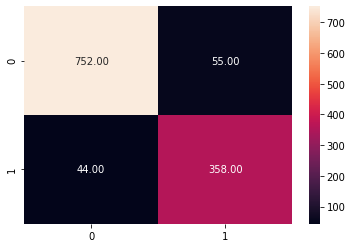

In [97]:
# Prediction and Evaluation

y_pred = nb.predict(x_test)
conf = confusion_matrix(y_pred=y_pred,y_true=y_test)
seaborn.heatmap(conf,annot=True,fmt=".2f")
plt.show()